## Code

In [197]:
with open("input.txt", "r") as file:
    content = file.read()

content

'A--1-->B\nA--3-->C\nB--1-->D\nC--1-->D\nC--4-->E\nD--1-->E\n'

In [199]:
import re

pattern_letters = r"[a-zA-Z]"
nodes = re.findall(pattern_letters, content)
pattern_numbers = r"[1-9]"
weights = re.findall(pattern_numbers, content)
weights = list(map(int, numbers))
nodes, weights

(['A', 'B', 'A', 'C', 'B', 'D', 'C', 'D', 'C', 'E', 'D', 'E'],
 [1, 3, 1, 1, 4, 1])

In [201]:
edges = list(zip(letters[::2], letters[1::2], weights))
edges

[('A', 'B', 1),
 ('A', 'C', 3),
 ('B', 'D', 1),
 ('C', 'D', 1),
 ('C', 'E', 4),
 ('D', 'E', 1)]

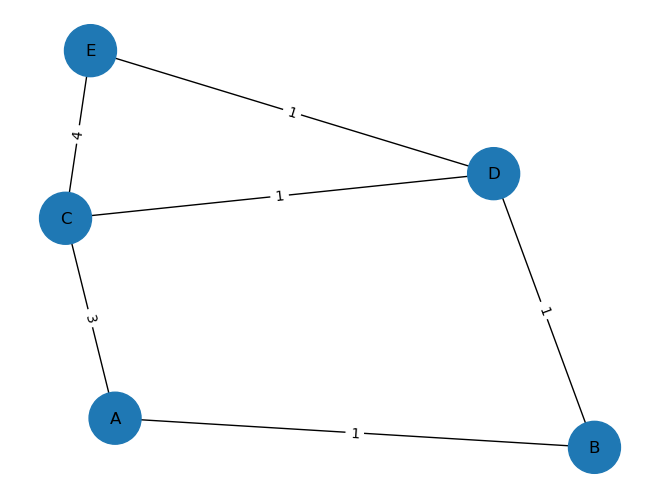

In [203]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for node in nodes:
    G.add_node(node, size = 1400)

G.add_weighted_edges_from(edges)

node_sizes = [G.nodes[node]['size'] for node in G.nodes()]

pos = nx.spring_layout(G)

nx.draw(G, pos,node_size=node_sizes ,with_labels=True, font_size=12)

edge_labels = nx.get_edge_attributes(G, 'weight')  # Get edge weights
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()

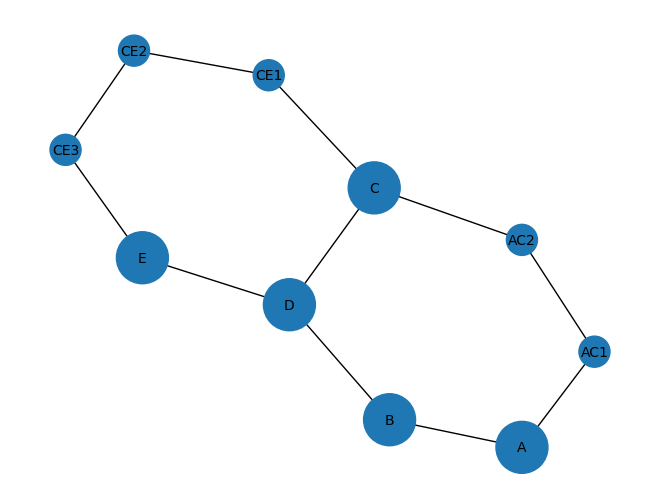

In [205]:
G = nx.Graph()

# Add initial nodes with a default size
for node in nodes:
    G.add_node(node, size=1400)

# List to store new edges
new_edges = []

# Process edges
for edge in edges:
    edge_start, edge_end, weight = edge
    if weight > 1:
        # Create intermediate nodes and edges
        intermediate_nodes = []
        for i in range(weight - 1):
            intermediate_node = f"{edge_start}{edge_end}{i + 1}"
            G.add_node(intermediate_node, size=500)
            intermediate_nodes.append(intermediate_node)

        # Add edges between the start node, intermediate nodes, and end node
        G.add_edge(edge_start, intermediate_nodes[0])  # First intermediate
        new_edges.append((edge_start, intermediate_nodes[0]))  # Add to new_edges list

        for i in range(len(intermediate_nodes) - 1):
            G.add_edge(intermediate_nodes[i], intermediate_nodes[i + 1])  # Between intermediates
            new_edges.append((intermediate_nodes[i], intermediate_nodes[i + 1]))  # Add to new_edges

        G.add_edge(intermediate_nodes[-1], edge_end)  # Last intermediate to end
        new_edges.append((intermediate_nodes[-1], edge_end))  # Add to new_edges
    else:
        # Add the edge directly
        G.add_edge(edge_start, edge_end)
        new_edges.append((edge_start, edge_end))  # Add to new_edges

# Set node sizes
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]

# Define layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, node_size=node_sizes, with_labels=True, font_size=10)

# Show the plot
plt.show()

Shortest Path: A -> B -> D -> E with cost 3
Execution Time: 0.000000 seconds


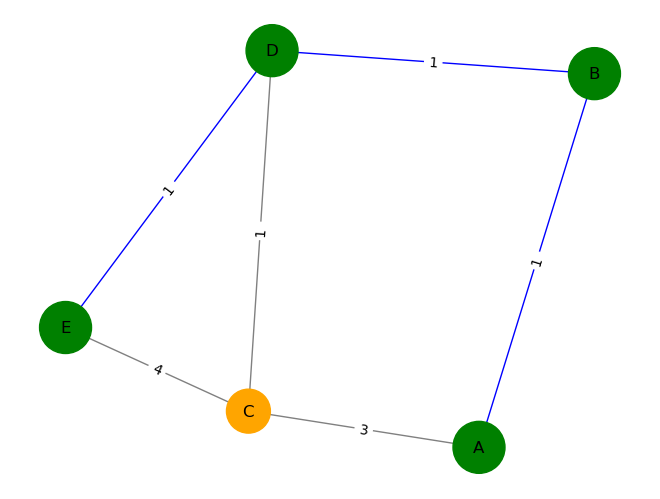

In [223]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time
from collections import defaultdict

def create_adjacency_list(edges):
    """Converts a list of edges into an adjacency list."""
    graph = defaultdict(list)
    for u, v, w in edges:
        graph[u].append((v, w))
        graph[v].append((u, w))  # Undirected graph
    return graph

def uniform_cost_search(graph, start, goal):
    """Performs Uniform Cost Search (UCS) to find the shortest path."""
    priority_queue = [(0, [start])]  # (cumulative cost, path to the node)
    visited = set()  # To track visited cities

    while priority_queue:
        current_cost, current_path = heapq.heappop(priority_queue)
        current_city = current_path[-1]

        if current_city == goal:
            return current_cost, current_path

        if current_city in visited:
            continue
        visited.add(current_city)

        for neighbor, cost in graph.get(current_city, []):
            if neighbor not in visited:
                heapq.heappush(priority_queue, (current_cost + cost, current_path + [neighbor]))

    return float("inf"), None

# Convert edges to adjacency list
graph = create_adjacency_list(edges)

# Start and goal cities
start_city = "A"
end_city = "E"

# Perform UCS to find the shortest path
cost, shortest_path = uniform_cost_search(graph, start_city, end_city)

# Create the graph using NetworkX
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Highlight nodes in the shortest path
node_colors = []
for node in G.nodes():
    if node in shortest_path:
        node_colors.append('green')  # Color for shortest path nodes
    else:
        node_colors.append('orange')  # Default color for other nodes

# Highlight edges in the shortest path
shortest_path_edges = [
    (shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)
]
edge_colors = []
for edge in G.edges():
    if edge in shortest_path_edges or (edge[1], edge[0]) in shortest_path_edges:
        edge_colors.append('blue')  # Color for shortest path edges
    else:
        edge_colors.append('gray')  # Default color for other edges

# Node sizes
node_sizes = [1400 if node in shortest_path else 1000 for node in G.nodes()]

# Layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color=edge_colors,
    with_labels=True,
    font_size=12
)

# Add edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the shortest path and graph
print(f"Shortest Path: {' -> '.join(shortest_path)} with cost {cost}")

# Measure execution time
start_time = time.time()
cost, path = uniform_cost_search(graph, start_city, end_city)
end_time = time.time()

print(f"Execution Time: {end_time - start_time:.6f} seconds")

plt.show()


BFS Order: A -> B -> AC1 -> D -> AC2 -> C -> E


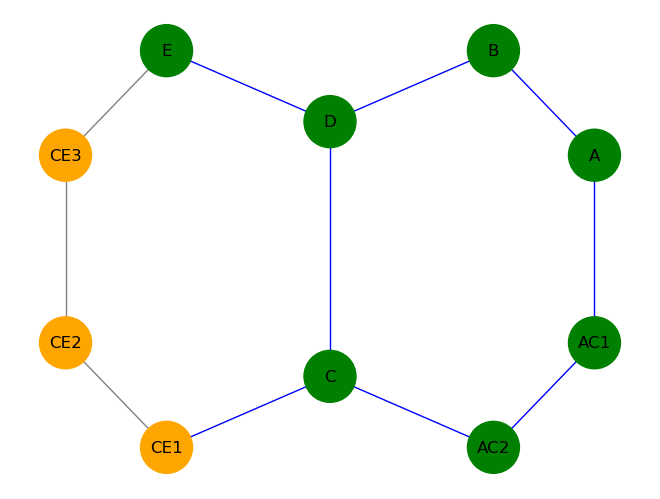

In [243]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs(graph, start, end):
    """Performs Breadth-First Search (BFS) on the graph starting from 'start' until 'end'."""
    visited = set()
    queue = deque([start])
    bfs_order = []
    bfs_edges = []  # To track edges used in the BFS traversal

    while queue:
        current = queue.popleft()
        if current not in visited:
            visited.add(current)
            bfs_order.append(current)
            if current == end:  # Stop when the end node is reached
                break
            for neighbor in graph[current]:
                if neighbor not in visited:
                    queue.append(neighbor)
                    bfs_edges.append((current, neighbor))  # Track edge

    return bfs_order, bfs_edges

# Define the graph structure
edges = new_edges

# Create a graph using NetworkX
G = nx.Graph()
G.add_edges_from(edges)

# Convert the edges into an adjacency list for BFS
graph_adj_list = {node: [] for edge in edges for node in edge}
for u, v in edges:
    graph_adj_list[u].append(v)
    graph_adj_list[v].append(u)

# Perform BFS starting from 'A' and stopping at 'E'
start_node = 'A'
end_node = 'E'
bfs_result, bfs_edges = bfs(graph_adj_list, start_node, end_node)

# Color nodes based on BFS result
node_colors = ['green' if node in bfs_result else 'orange' for node in G.nodes()]

# Color edges based on BFS traversal
edge_colors = [
    'blue' if edge in bfs_edges or (edge[1], edge[0]) in bfs_edges else 'gray'
    for edge in G.edges()
]

# Layout for the graph
pos = nx.spectral_layout(G)

# Draw the graph
nx.draw(
    G, pos,
    node_size=1400,
    node_color=node_colors,
    edge_color=edge_colors,
    with_labels=True,
    font_size=12
)

# Add edge labels (if weights are present)
edge_labels = nx.get_edge_attributes(G, 'weight')
if edge_labels:
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display BFS result
print(f"BFS Order: {' -> '.join(bfs_result)}")

# Show the graph
plt.show()


DFS Order: A -> B -> D -> C -> AC2 -> AC1 -> CE1 -> CE2 -> CE3 -> E


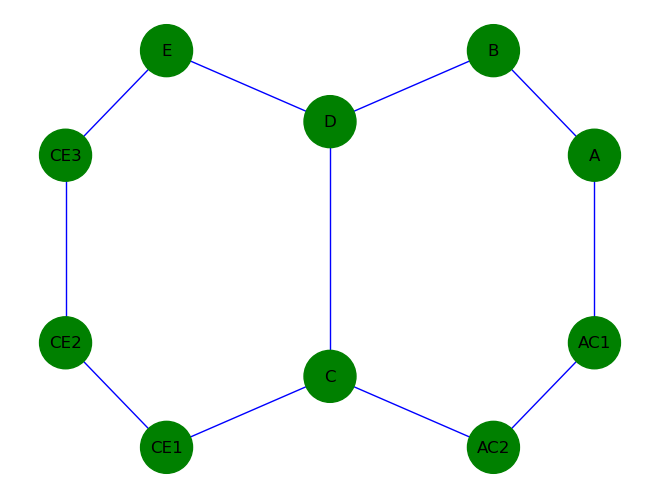

In [245]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs(graph, start, end):
    """Performs Depth-First Search (DFS) on the graph starting from 'start' until 'end'."""
    visited = set()
    stack = [start]
    dfs_order = []
    dfs_edges = []  # To track edges used in the DFS traversal

    while stack:
        current = stack.pop()
        if current not in visited:
            visited.add(current)
            dfs_order.append(current)
            if current == end:  # Stop when the end node is reached
                break
            # Add neighbors in reverse order to ensure we explore left to right
            for neighbor in reversed(graph[current]):
                if neighbor not in visited:
                    stack.append(neighbor)
                    dfs_edges.append((current, neighbor))  # Track edge

    return dfs_order, dfs_edges

# Define the graph structure
edges = new_edges

# Create a graph using NetworkX
G = nx.Graph()
G.add_edges_from(edges)

# Convert the edges into an adjacency list for DFS
graph_adj_list = {node: [] for edge in edges for node in edge}
for u, v in edges:
    graph_adj_list[u].append(v)
    graph_adj_list[v].append(u)

# Perform DFS starting from 'A' and stopping at 'E'
start_node = 'A'
end_node = 'E'
dfs_result, dfs_edges = dfs(graph_adj_list, start_node, end_node)

# Color nodes based on DFS result
node_colors = ['green' if node in dfs_result else 'orange' for node in G.nodes()]

# Color edges based on DFS traversal
edge_colors = [
    'blue' if edge in dfs_edges or (edge[1], edge[0]) in dfs_edges else 'gray'
    for edge in G.edges()
]

# Layout for the graph
pos = nx.spectral_layout(G)

# Draw the graph
nx.draw(
    G, pos,
    node_size=1400,
    node_color=node_colors,
    edge_color=edge_colors,
    with_labels=True,
    font_size=12
)

# Add edge labels (if weights are present)
edge_labels = nx.get_edge_attributes(G, 'weight')
if edge_labels:
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display DFS result
print(f"DFS Order: {' -> '.join(dfs_result)}")

# Show the graph
plt.show()
